# Sentiment Analysis with NLTK and Transformers

## Introduction

Sentiment analysis, also known as opinion mining, is a field of natural language processing (NLP) that aims to determine the emotional tone behind a body of text. It is widely used in various applications, such as analyzing customer reviews, social media monitoring, and market research. In this project, we will perform sentiment analysis using both traditional machine learning techniques and advanced transformer-based models.

We will start by utilizing the Natural Language Toolkit (NLTK), a powerful library for text processing in Python. NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and more.

For advanced sentiment analysis, we will leverage transformer-based models from the `transformers` library by Hugging Face. These models, such as BERT, RoBERTa, and DistilBERT, have revolutionized NLP by achieving state-of-the-art performance on various tasks.

The dataset we will use for this project is the NLTK movie reviews corpus, which contains a collection of movie reviews categorized by their sentiment (positive or negative).

### Dataset Information

- **Source**: The dataset is obtained from the NLTK library.
- **Data Types**: The dataset consists of text data and labels indicating the sentiment (positive or negative).

### Procedure

1. **Data Collection**:
   - Load the NLTK movie and food reviews dataset.
   - Shuffle the dataset to ensure randomness.

2. **Data Preprocessing**:
   - Tokenize the text data.
   - Normalize the text (e.g., converting to lowercase, removing punctuation).
   - Extract features using methods such as Bag of Words (BoW) or TF-IDF.

3. **Model Training**:
   - Split the data into training and testing sets.
   - Train a traditional machine learning model (e.g., Naive Bayes) using the extracted features.
   - Train a transformer-based model (e.g., BERT, RoBERTa) for advanced sentiment analysis.

4. **Model Evaluation**:
   - Evaluate the performance of both models using metrics such as accuracy, precision, recall, and F1 score.
   - Compare the results of the traditional machine learning model and the transformer-based model.

5. **Prediction**:
   - Use the trained models to predict the sentiment of new, unseen text data.
   - Analyze the results and discuss the findings.

6. **Conclusion**:
   - Summarize the results of the sentiment analysis.
   - Highlight the advantages and limitations of using traditional machine learning techniques versus transformer-based models.


## Import Libraries

In [12]:
# Install all necessary libraries using pip
!pip install nltk
!pip install transformers
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install tqdm
!pip install colorama
!pip install seaborn
!pip install matplotlib
!pip install shap
!pip install nltk textblob


# Download the 'averaged_perceptron_tagger' data for nltk
import nltk
nltk.download('averaged_perceptron_tagger')

# Import necessary libraries
import sklearn
import transformers
import torch
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import colorama

# Set the plotting style
plt.style.use('ggplot')

# Verify installations (optional)
print("All libraries are successfully installed and imported!")


DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/huggingface_hub-0.23.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/huggingface_hub-0.23.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/huggingface_hub-0.23.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/huggingface_hub-0.23.0-py3.8.egg is d

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jobayub/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load dataset and check shape


In [13]:
file_path = 'amazonreviews.csv'

try:
    # Adjust quoting and define an escape character
    df = pd.read_csv(file_path, quoting=csv.QUOTE_NONE, escapechar='\\', on_bad_lines='skip')
except Exception as e:
    print("Failed to read CSV with error:", e)

# Check the DataFrame
if 'df' in locals():
    print(df.shape)


(601, 10)


# Check DataFrame size


In [14]:
print(df.size)

6010


In [15]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [17]:
print(df.head(10))

   Id   ProductId          UserId              ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW               delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                   dll pa   
2   4  B000UA0QIQ  A395BORC6FGVXV                     Karl   
3   9  B000E7L2R4  A1MZYO9TZK0BBI                 R. James   
4  10  B00171APVA  A21BT40VZCCYT4            Carol A. Reed   
5  14  B001GVISJM  A18ECVX2RJ7HUE      "willie ""roadie"""   
6  15  B001GVISJM  A2MUGFV2TDQ47K  "Lynrie ""Oh HELL no"""   
7  17  B001GVISJM  A3KLWF6WQ5BNYO           Erica Neathery   
8  18  B001GVISJM   AFKW14U97Z6QO                    Becca   
9  20  B001GVISJM  A3IV7CL2C13K2U                     Greg   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     3                       3      2  1307923200   
3                     1              

# Observations

1. **DataFrame Shape**:
   - 601 rows and 10 columns.

2. **DataFrame Size**:
   - Total elements: 6010.

3. **Sample Data**:
   - Key columns: `Id`, `ProductId`, `UserId`, `ProfileName`, `HelpfulnessNumerator`, `HelpfulnessDenominator`, `Score`, `Time`, `Summary`, `Text`.
   - Each row represents an Amazon product review.
   - Example: The first review is for product `B001E4KFG0` by user `A3SGXH7AUHU8GW`, titled "Good Quality Dog Food", rated 5 stars.


# Grouping

In [20]:
from IPython.display import display

In [19]:
# Grouping by the 'Summary' column instead of 'title'
grouped_df = df.groupby('Summary')

# Iterate over the groups and print the title (Summary) and corresponding data
for title, group in grouped_df:
    print(f"Title: {title}")  # Here 'title' refers to the content of the 'Summary' column
    print(group)
    print("\n")


Title: 70% of the chips in the bag are over cooked
      Id   ProductId         UserId                       ProfileName  \
128  484  B000G6RYNE  AOHRHPJP38LLT  "S. Samoranos ""Inspired cook"""   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
128                     0                       0      2  1214784000   

                                         Summary  \
128  70% of the chips in the bag are over cooked   

                                                  Text  
128  I like Kettle chips but was really disappointe...  


Title: A Great All Around Mix
      Id   ProductId         UserId                    ProfileName  \
107  396  B001ELL6O8  A72H1W5S6UFMY  "King of Breakfasts ""King"""   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
107                     1                       1      5  1278460800   

                    Summary                                               Text  
107  A Great All Around Mix  I apprecia

In [21]:
# Grouping by the 'Summary' column instead of 'title'
grouped_df = df.groupby('Summary')

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over the groups and append each group DataFrame to the list
for summary, group in grouped_df:
    # Add a new column 'Title' to each group DataFrame
    group['Title'] = summary
    dfs.append(group)

# Concatenate the list of DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Display the result DataFrame as a table
display(result_df)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Title
0,484,B000G6RYNE,AOHRHPJP38LLT,"""S. Samoranos """"Inspired cook""""""",0,0,2,1214784000,70% of the chips in the bag are over cooked,I like Kettle chips but was really disappointe...,70% of the chips in the bag are over cooked
1,396,B001ELL6O8,A72H1W5S6UFMY,"""King of Breakfasts """"King""""""",1,1,5,1278460800,A Great All Around Mix,I appreciate the fact that I can buy this prod...,A Great All Around Mix
2,914,B000ER6YO0,AOIW6NFHHPT78,"""Sarathetis """"Sarathetis""""""",1,1,5,1284336000,A favorite!,Soft smooth texture - my little one devours th...,A favorite!
3,1007,B002XG21MO,A1TQQQAYEDEY6B,Chris,0,0,5,1304985600,A great price!,These are just like the animal crackers we eat...,A great price!
4,1915,B0016PKA1C,A1BFF0SPH2VZC4,"""A. Wise """"Ilikestuff""""""",4,4,3,1265068800,A little hard to open,I bought this as a gift for my mother. She lik...,A little hard to open
...,...,...,...,...,...,...,...,...,...,...,...
596,313,B002X9JNYU,AVPSSODZIDABZ,HELfromBL,1,3,1,1323388800,what quantity is it!,I wouldn't even think of buying this product u...,what quantity is it!
597,931,B000ER6YO0,A2UY1O1FBGKIE6,"""U. Kane """"UBK""""""",0,0,5,1293840000,yum,I always try the food before I feed it to my d...,yum
598,1657,B001RVFDOO,A2JVP3CLTUY6DV,"""F. Welstand """"franetta""""""",0,0,5,1298592000,yum,My husband and I both really like the popchips...,yum
599,1036,B001E6KBSK,A2CH71BG8TO5NN,husband favorite treat,0,2,5,1316995200,yummy for ur tummy,its hard to find in the us my husband frm jama...,yummy for ur tummy


In [22]:
# Count the number of unique summaries
num_unique_summaries = df['Summary'].nunique()

print("Number of different summaries:", num_unique_summaries)


Number of different summaries: 564


In [23]:
df['Text'].iloc[0:10]

0    I have bought several of the Vitality canned d...
1    "Product arrived labeled as Jumbo Salted Peanu...
2    If you are looking for the secret ingredient i...
3    Right now I'm mostly just sprouting this so my...
4    This is a very healthy dog food. Good for thei...
5    good flavor! these came securely packed... the...
6    The Strawberry Twizzlers are my guilty pleasur...
7    I love eating them and they are good for watch...
8    I am very satisfied with my Twizzler purchase....
9    Candy was delivered very fast and was purchase...
Name: Text, dtype: object

## EDA


## Count of Reviews by Stars


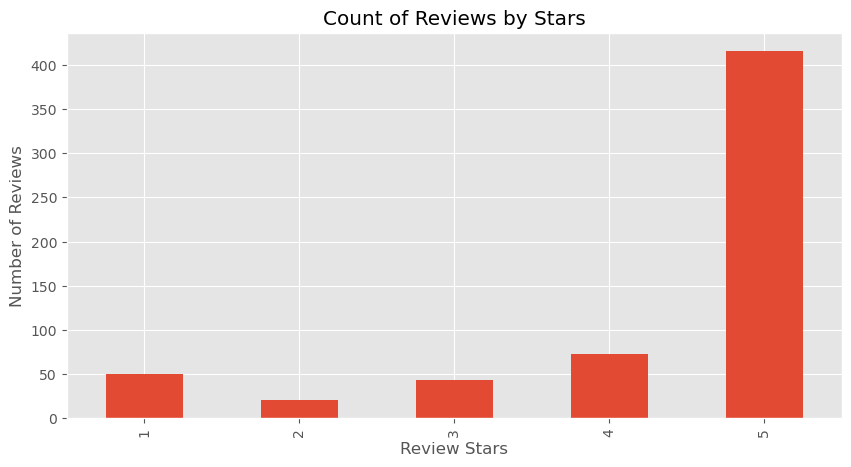

In [24]:
# Assuming 'Score' is the correct column that contains the review star ratings
if 'Score' in df.columns:
    # Generate the plot
    ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
                                                      title='Count of Reviews by Stars', 
                                                      figsize=(10, 5))
    ax.set_xlabel('Review Stars')  # Set the x-axis label
    ax.set_ylabel('Number of Reviews')  # Adding a label for the y-axis

    plt.show()
else:
    print("The 'Score' column is not in the DataFrame.")

# Observations

- The majority of reviews have a 5-star rating, indicating a generally positive sentiment in the dataset.
- There are fewer reviews with 1-star and 2-star ratings compared to higher ratings.
- The number of reviews increases significantly from 1-star to 5-star, with 5-star reviews being the most frequent.
- This distribution suggests that customers are more inclined to leave positive feedback.


## Distribution of Helpfulness Scores

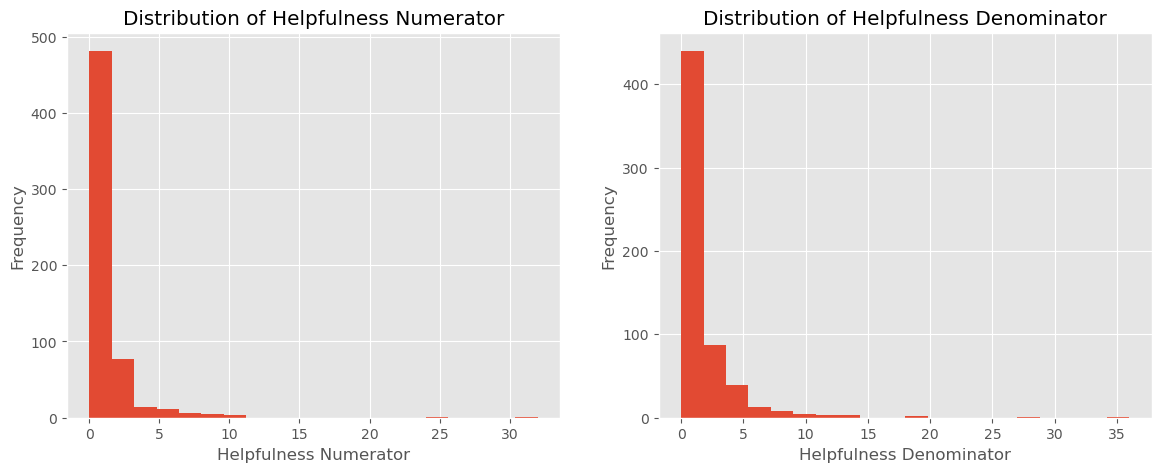

In [25]:
# Plot the distribution of HelpfulnessNumerator and HelpfulnessDenominator
if 'HelpfulnessNumerator' in df.columns and 'HelpfulnessDenominator' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    df['HelpfulnessNumerator'].plot(kind='hist', bins=20, ax=axes[0], title='Distribution of Helpfulness Numerator')
    axes[0].set_xlabel('Helpfulness Numerator')
    
    df['HelpfulnessDenominator'].plot(kind='hist', bins=20, ax=axes[1], title='Distribution of Helpfulness Denominator')
    axes[1].set_xlabel('Helpfulness Denominator')
    
    plt.show()
else:
    print("The 'HelpfulnessNumerator' or 'HelpfulnessDenominator' column is not in the DataFrame.")


# Observations

### Helpfulness Numerator
- The majority of reviews have a Helpfulness Numerator of 0, indicating that many reviews did not receive any helpful votes.
- A smaller number of reviews received between 1 and 5 helpful votes.
- Very few reviews have a Helpfulness Numerator greater than 5.

### Helpfulness Denominator
- Similar to the Helpfulness Numerator, the majority of reviews have a Helpfulness Denominator of 0, suggesting that many reviews were not evaluated for helpfulness.
- A small number of reviews have a Helpfulness Denominator between 1 and 5.
- Very few reviews have a Helpfulness Denominator exceeding 5.

These distributions indicate that most reviews do not receive helpfulness evaluations, and among those that do, the majority receive only a few helpful votes.


## Distribution of Review Lengths

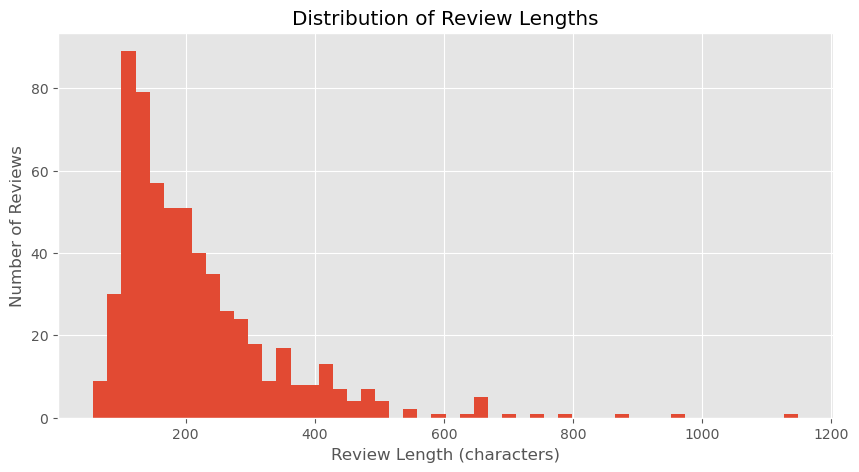

In [26]:
# Plot the distribution of review lengths
if 'Text' in df.columns:
    df['ReviewLength'] = df['Text'].apply(len)
    
    plt.figure(figsize=(10, 5))
    df['ReviewLength'].plot(kind='hist', bins=50, title='Distribution of Review Lengths')
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Number of Reviews')
    plt.show()
else:
    print("The 'Text' column is not in the DataFrame.")


# Observations


- The histogram shows the distribution of review lengths in terms of the number of characters.
- Most reviews are relatively short, with the majority of them falling under 200 characters.
- There is a steep decline in the number of reviews as the length increases beyond 200 characters.
- A small number of reviews extend beyond 400 characters, with very few reviews reaching lengths of 800 to 1200 characters.
- This indicates that users tend to write concise reviews, with lengthy reviews being less common.


## NLTK and VADER Sentiment Analysis



### Example Text and Tokenization

In this cell, we take a review text example from the dataset, print it, and tokenize it using NLTK's `word_tokenize` function.


In [42]:
example = df['Text'][41]
print(example)

I really loved the spicy flavor these had.  I found myself liking the broth more than the noodles which is usually the opposite.  If you aren't used to the heat this might bother you and if you like hot hot foods this might not be enough.


Tokenize the example text into individual words.


In [46]:
tokens = nltk.word_tokenize(example) #token a review
tokens[:12]

['I',
 'really',
 'loved',
 'the',
 'spicy',
 'flavor',
 'these',
 'had',
 '.',
 'I',
 'found',
 'myself']

### Part of Speech Tagging

In this cell, we perform Part of Speech (POS) tagging on the tokenized words to identify their grammatical roles.


In [47]:
nltk.pos_tag(tokens) #POS- part of speech

[('I', 'PRP'),
 ('really', 'RB'),
 ('loved', 'VBD'),
 ('the', 'DT'),
 ('spicy', 'NN'),
 ('flavor', 'NN'),
 ('these', 'DT'),
 ('had', 'VBD'),
 ('.', '.'),
 ('I', 'PRP'),
 ('found', 'VBD'),
 ('myself', 'PRP'),
 ('liking', 'VBG'),
 ('the', 'DT'),
 ('broth', 'NN'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('the', 'DT'),
 ('noodles', 'NNS'),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('usually', 'RB'),
 ('the', 'DT'),
 ('opposite', 'NN'),
 ('.', '.'),
 ('If', 'IN'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ("n't", 'RB'),
 ('used', 'VBN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('heat', 'NN'),
 ('this', 'DT'),
 ('might', 'MD'),
 ('bother', 'VB'),
 ('you', 'PRP'),
 ('and', 'CC'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('like', 'VBP'),
 ('hot', 'JJ'),
 ('hot', 'JJ'),
 ('foods', 'NNS'),
 ('this', 'DT'),
 ('might', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('enough', 'RB'),
 ('.', '.')]

### Print Tagged Tokens

Print the tagged tokens for verification.


In [48]:
tagged = tokens
print(tagged)

['I', 'really', 'loved', 'the', 'spicy', 'flavor', 'these', 'had', '.', 'I', 'found', 'myself', 'liking', 'the', 'broth', 'more', 'than', 'the', 'noodles', 'which', 'is', 'usually', 'the', 'opposite', '.', 'If', 'you', 'are', "n't", 'used', 'to', 'the', 'heat', 'this', 'might', 'bother', 'you', 'and', 'if', 'you', 'like', 'hot', 'hot', 'foods', 'this', 'might', 'not', 'be', 'enough', '.']


## VADER Sentiment Scoring

In this cell, we use the VADER sentiment analyzer to score the sentiment of sample texts and the example review.


In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


### Calculate sentiment scores for sample sentences.


In [50]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [51]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [52]:
sia.polarity_scores(example)

{'neg': 0.046, 'neu': 0.772, 'pos': 0.181, 'compound': 0.7902}

### Apply VADER to the Dataset

Here we apply the VADER sentiment analyzer to each review in the dataset and store the results.


In [57]:
from colorama import Fore
from tqdm import tqdm
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming df is your DataFrame and it has a column named 'text'
if 'Text' in df.columns:
    # Run the polarity score on the entire dataset
    res = {}
    for i, row in tqdm(df.iterrows(), total=len(df), bar_format="{l_bar}%s{bar}%s{r_bar}" % (Fore.GREEN, Fore.RESET)):
        text = row['Text']
        myid = i  # Use the index as the identifier
        res[myid] = sia.polarity_scores(text)
else:
    print("The 'text' column is not in the DataFrame.")



100%|███████████████████████████████████████| 601/601 [00:00<00:00, 4285.93it/s]


In [58]:
res

{0: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 1: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 4: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 5: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 6: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 7: {'neg': 0.097, 'neu': 0.694, 'pos': 0.209, 'compound': 0.7481},
 8: {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883},
 9: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077},
 10: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687},
 11: {'neg': 0.085, 'neu': 0.771, 'pos': 0.143, 'compound': 0.2617},
 12: {'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956},
 13: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441},
 14: {'neg': 0.031, 'neu': 0.778, 'pos': 0.191, 'compound': 0.8421},
 15:

### Convert Results to DataFrame

Convert the sentiment analysis results into a DataFrame and merge with the original dataset.


In [59]:
res_df = pd.DataFrame(res).T

# Set index for the VADER DataFrame
res_df.index.name = 'Id'

# Merge the results with the original DataFrame
vaders = res_df.merge(df, how='left', left_index=True, right_index=True)
vaders.head()


,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength
Id,,,,,,,,,,,,,,,
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",194
2,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
3,0.000,0.851,0.149,0.6369,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,131
4,0.000,0.705,0.295,0.8313,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,137


### Visualization of Sentiment Scores

Plot the compound sentiment score against the Amazon star reviews.


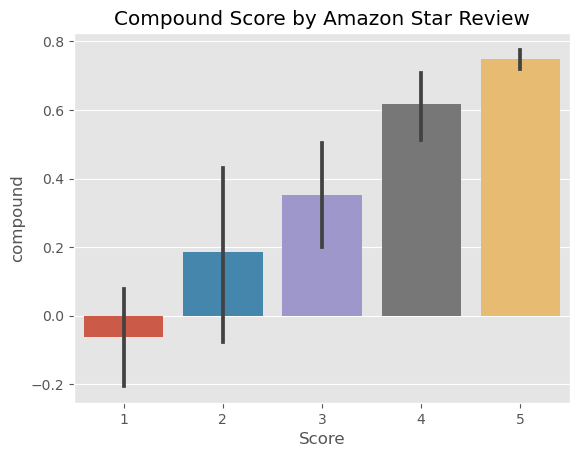

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()


# Observations

## Compound Score by Amazon Star Review

- The compound sentiment scores increase with the number of stars, indicating a positive correlation between higher star ratings and more positive sentiment scores.
- Reviews with 1-star ratings have a negative average compound score, reflecting negative sentiment.
- Reviews with 2-star ratings have a slightly positive average compound score but are lower than those with higher star ratings.
- Reviews with 3-star ratings show a noticeable increase in the average compound score, indicating neutral to slightly positive sentiment.
- Reviews with 4-star ratings have a significantly higher average compound score, reflecting positive sentiment.
- Reviews with 5-star ratings have the highest average compound score, indicating very positive sentiment.
- This trend suggests that VADER's compound sentiment score effectively captures the sentiment corresponding to the star ratings given by users.


### Create subplots for Positive, Neutral, and Negative sentiment scores.


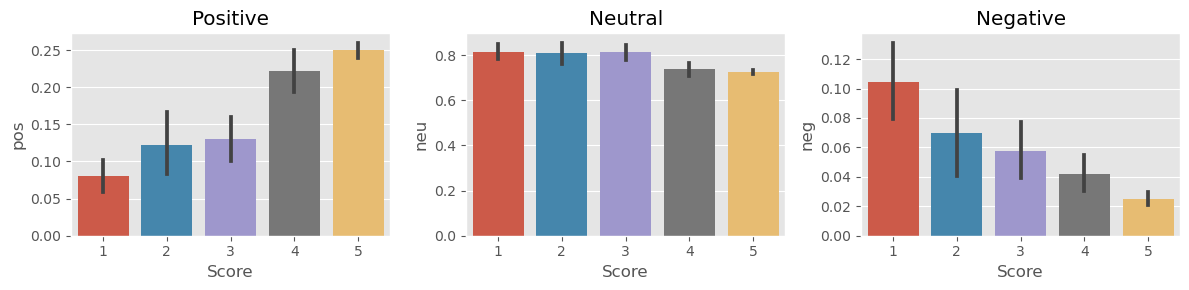

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
axs[0].set_title('Positive')

sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
axs[1].set_title('Neutral')

sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


# Observations

## Sentiment Scores by Amazon Star Review

### Positive Sentiment Scores
- The average positive sentiment score increases with the number of stars.
- 5-star reviews have the highest positive sentiment scores, indicating strong positive sentiment.
- 1-star reviews have the lowest positive sentiment scores, reflecting weak positive sentiment.

### Neutral Sentiment Scores
- Neutral sentiment scores are relatively consistent across all star ratings.
- There is a slight decrease in neutral sentiment scores for 5-star reviews compared to lower star ratings.

### Negative Sentiment Scores
- The average negative sentiment score decreases as the number of stars increases.
- 1-star reviews have the highest negative sentiment scores, indicating strong negative sentiment.
- 5-star reviews have the lowest negative sentiment scores, reflecting weak negative sentiment.

These trends suggest that as the star ratings increase, the positive sentiment scores increase and the negative sentiment scores decrease, while neutral sentiment scores remain fairly consistent.
v

### Impactful Words Analysis

Identify and visualize words that contribute most to positive and negative sentiment scores.


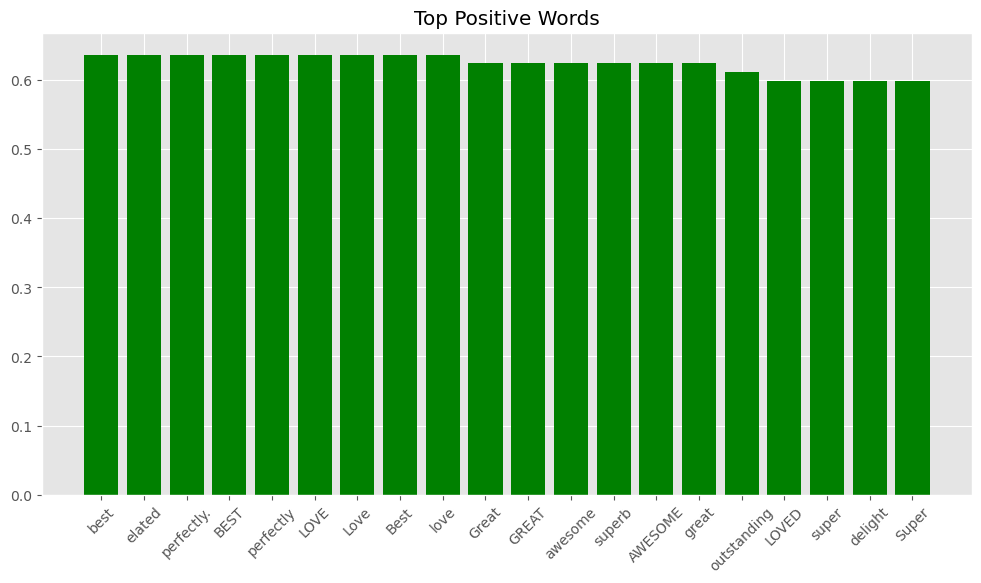

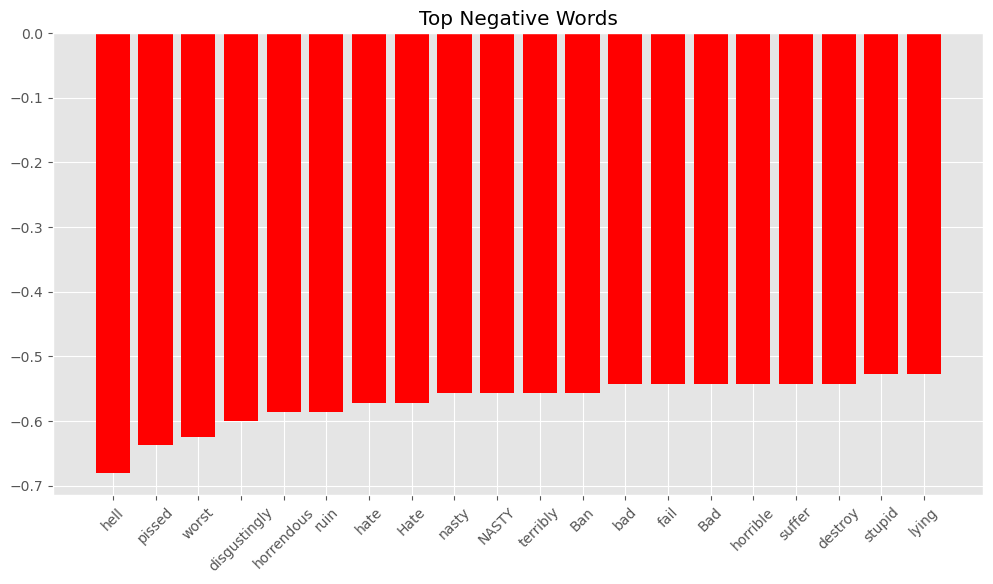

In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict
import pandas as pd

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get word sentiment scores
def get_word_sentiments(text):
    words = nltk.word_tokenize(text)
    word_sentiments = defaultdict(list)
    for word in words:
        score = sia.polarity_scores(word)['compound']
        word_sentiments[word].append(score)
    return word_sentiments

# Aggregate sentiment scores for all words
all_word_sentiments = defaultdict(list)
for text in df['Text']:
    word_sentiments = get_word_sentiments(text)
    for word, scores in word_sentiments.items():
        all_word_sentiments[word].extend(scores)

# Calculate average sentiment score for each word
average_word_sentiments = {word: sum(scores)/len(scores) for word, scores in all_word_sentiments.items()}

# Separate positive and negative words
positive_words = {word: score for word, score in average_word_sentiments.items() if score > 0.5}
negative_words = {word: score for word, score in average_word_sentiments.items() if score < -0.5}

# Convert to DataFrame for easier plotting
positive_words_df = pd.DataFrame(positive_words.items(), columns=['Word', 'Score']).sort_values(by='Score', ascending=False).head(20)
negative_words_df = pd.DataFrame(negative_words.items(), columns=['Word', 'Score']).sort_values(by='Score').head(20)

# Plot the most positive words
plt.figure(figsize=(12, 6))
plt.bar(positive_words_df['Word'], positive_words_df['Score'], color='green')
plt.title('Top Positive Words')
plt.xticks(rotation=45)
plt.show()

# Plot the most negative words
plt.figure(figsize=(12, 6))
plt.bar(negative_words_df['Word'], negative_words_df['Score'], color='red')
plt.title('Top Negative Words')
plt.xticks(rotation=45)
plt.show()


In [73]:
from collections import defaultdict

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get word sentiment scores
def get_word_sentiments(text):
    words = nltk.word_tokenize(text)
    word_sentiments = defaultdict(list)
    for word in words:
        score = sia.polarity_scores(word)['compound']
        word_sentiments[word].append(score)
    return word_sentiments

# Aggregate sentiment scores for all words
all_word_sentiments = defaultdict(list)
for text in df['Text']:
    word_sentiments = get_word_sentiments(text)
    for word, scores in word_sentiments.items():
        all_word_sentiments[word].extend(scores)

# Calculate average sentiment score for each word
average_word_sentiments = {word: sum(scores)/len(scores) for word, scores in all_word_sentiments.items()}

# Separate positive and negative words
positive_words = {word: score for word, score in average_word_sentiments.items() if score > 0.5}
negative_words = {word: score for word, score in average_word_sentiments.items() if score < -0.5}

# Print top 10 positive and negative words to verify
print("Top Positive Words:", sorted(positive_words.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Negative Words:", sorted(negative_words.items(), key=lambda x: x[1])[:10])


Top Positive Words: [('best', 0.6369), ('BEST', 0.6369), ('perfectly', 0.6369), ('elated', 0.6369), ('perfectly.', 0.6369), ('Love', 0.6368999999999999), ('Best', 0.6368999999999999), ('LOVE', 0.6368999999999999), ('love', 0.636899999999999), ('Great', 0.6249000000000001)]
Top Negative Words: [('hell', -0.6808), ('pissed', -0.6369), ('worst', -0.6249), ('disgustingly', -0.5994), ('ruin', -0.5859), ('horrendous', -0.5859), ('Hate', -0.5719), ('hate', -0.5719), ('nasty', -0.5574), ('terribly', -0.5574)]


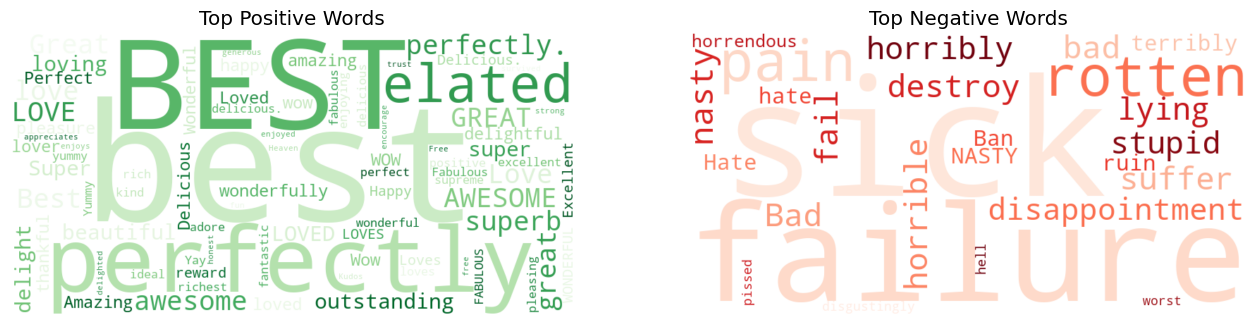

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the positive_words and negative_words dictionaries from the previous steps
positive_words = {word: score for word, score in average_word_sentiments.items() if score > 0.5}
negative_words = {word: score for word, score in average_word_sentiments.items() if score < -0.5}

# Generate word cloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(positive_words)

# Generate word cloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_words)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Top Positive Words')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Top Negative Words')
axes[1].axis('off')

plt.show()


# Roberta Pretrained Model

Using a model trained on a large corpus of data, the transformer model accounts for the words and the context related to other words for sentiment analysis.


In [75]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Import necessary libraries from transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Specify the model
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Create a sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Test the classifier
result = classifier("This is a test sentence for sentiment analysis.")
print(result)


[{'label': 'LABEL_1', 'score': 0.8272243738174438}]


## VADER Results on Example

Compare the sentiment analysis results of VADER and the Roberta model on the same example text.


In [77]:
# VADER results on example
print(example)
print(sia.polarity_scores(example))


I really loved the spicy flavor these had.  I found myself liking the broth more than the noodles which is usually the opposite.  If you aren't used to the heat this might bother you and if you like hot hot foods this might not be enough.
{'neg': 0.046, 'neu': 0.772, 'pos': 0.181, 'compound': 0.7902}


## Run for Roberta Model

Generate sentiment scores for an example text using the Roberta model.


In [82]:
from scipy.special import softmax
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)


{'roberta_neg': 0.08118543, 'roberta_neu': 0.19308394, 'roberta_pos': 0.7257306}


## Function to Get Polarity Scores using Roberta

Define a function to calculate polarity scores for texts using the Roberta model.


In [84]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict


## Applying VADER and Roberta to the Dataset

Apply both VADER and Roberta sentiment analysis to each review in the dataset and combine the results.


In [85]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for index {i}')


100%|█████████████████████████████████████████| 601/601 [00:27<00:00, 21.47it/s]


## Combine Results into DataFrame

Convert the combined results into a DataFrame and merge with the original DataFrame.


In [88]:
results_df = pd.DataFrame(res).T

# Reset the index and rename the index column to 'Id'
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Merge 'df' with 'results_df' based on the index column 'Id'
results_df = pd.merge(df, results_df, left_index=True, right_on='Id')


## Visualizing Combined Results

Create a pair plot to visualize the relationships between different sentiment scores from VADER and Roberta.


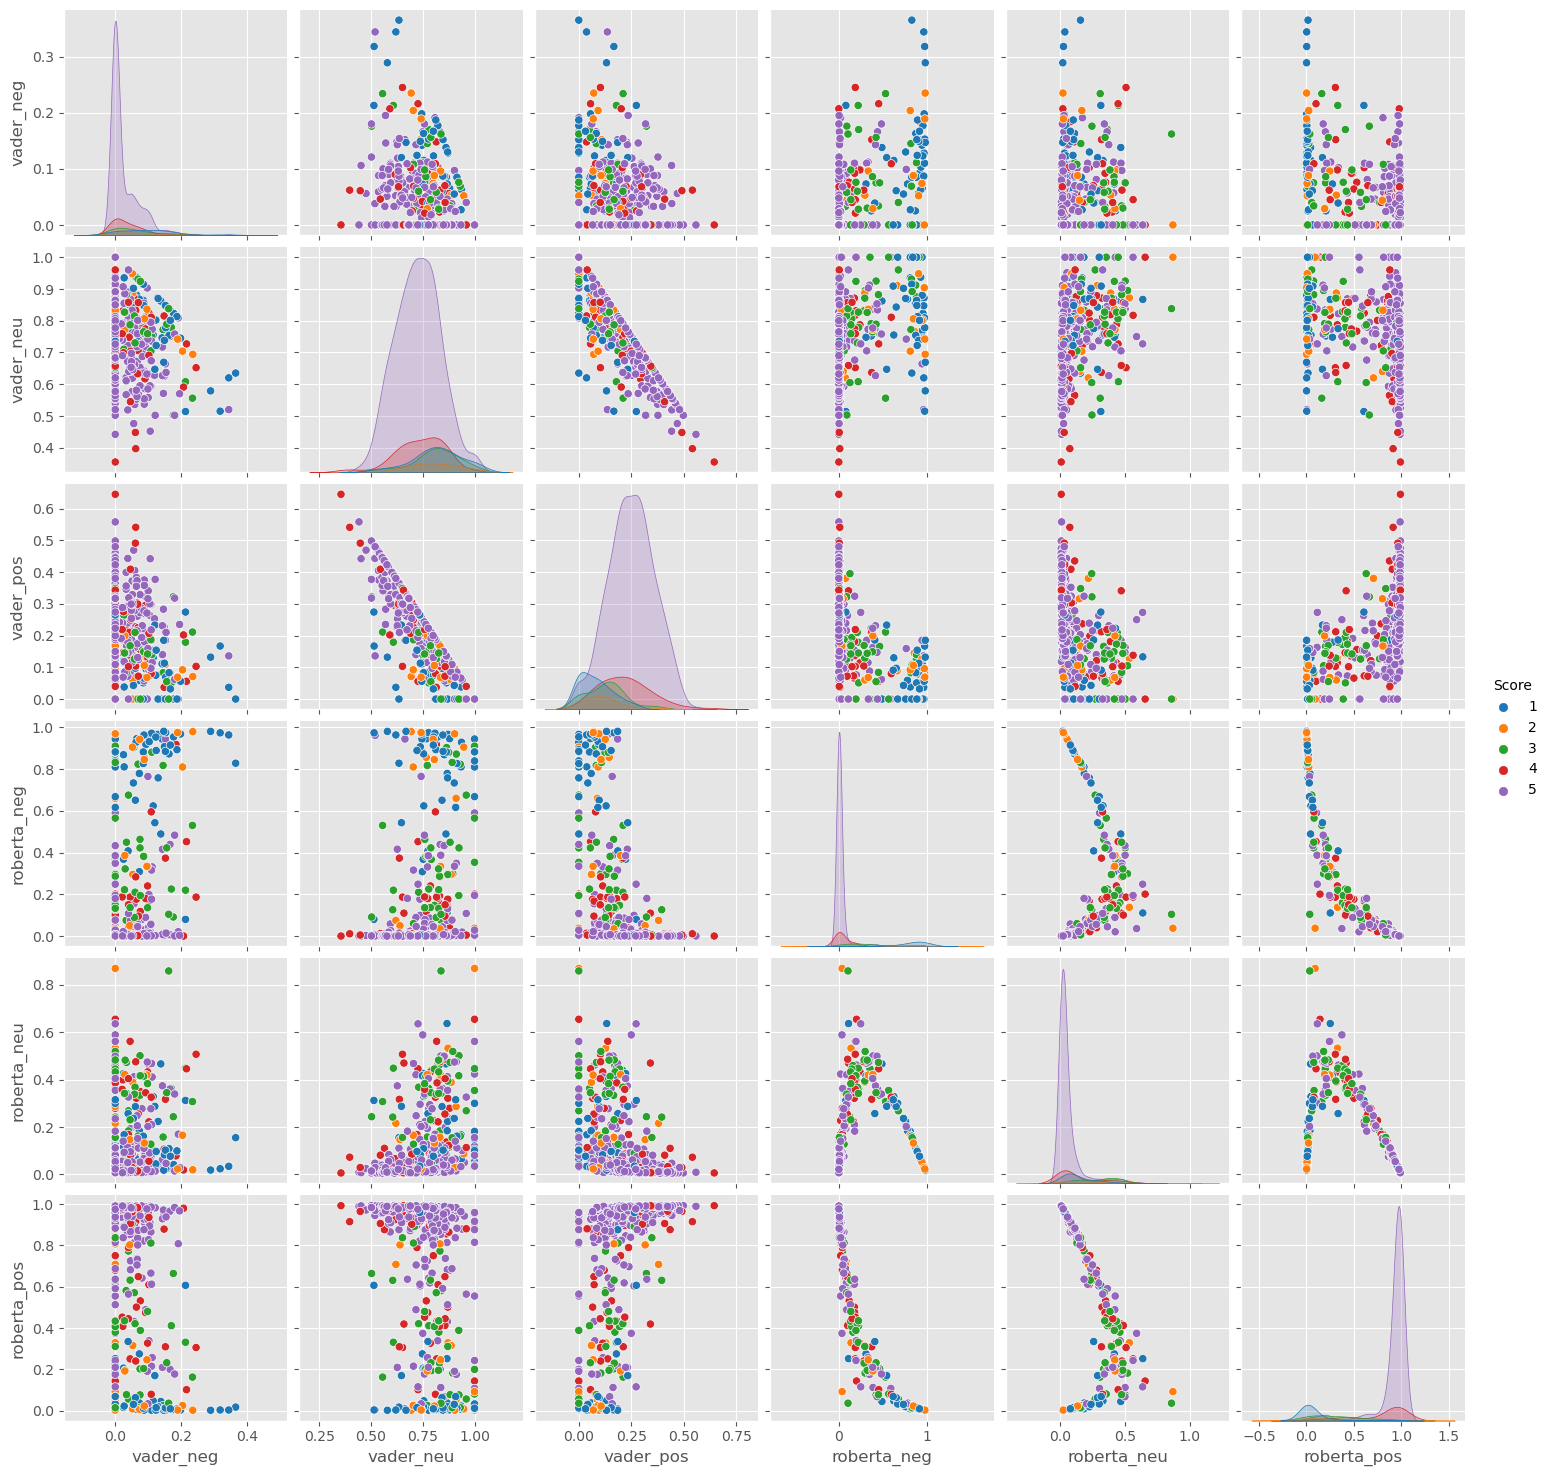

In [90]:

sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Score', palette='tab10')
plt.show()


### Observations from the Pair Plot

1. **Positive Sentiment Correlation**:
   - VADER and Roberta positive sentiment scores show a positive correlation.
   - Higher star ratings (4 and 5) are associated with higher positive sentiment scores from both models.

2. **Negative Sentiment Correlation**:
   - Negative sentiment scores have a negative correlation with star ratings. Lower ratings (1 and 2) show higher negative sentiment scores.
   - Some discrepancies exist between VADER and Roberta in negative sentiment scoring.

3. **Neutral Sentiment Scores**:
   - Neutral sentiment scores cluster similarly across different star ratings, indicating less discrimination.
   - Most reviews have similar neutral sentiment values in both models.

4. **Outliers and Discrepancies**:
   - Outliers where one model scores high positive or negative sentiment and the other scores low, indicating context-specific differences.

5. **Score Distribution**:
   - Clear separation of star ratings based on sentiment scores, with 5-star reviews showing high positive scores and 1-star reviews showing high negative scores.

6. **Model Agreement**:
   - Both models generally agree on sentiment, with diagonal clustering in pair plots indicating overall sentiment agreement.

7. **Neutral Reviews**:
   - 3-star reviews show a more distributed sentiment score, aligning with neutral or mixed reviews.

8. **Sentiment Polarity**:
   - Sentiment polarity aligns with star ratings; higher stars have higher positive sentiment, and lower stars have higher negative sentiment.

These observations indicate that both VADER and Roberta provide valuable sentiment insights, with Roberta potentially offering more nuanced understanding due to its context-aware nature.


In [91]:
results_df.columns

Index(['Id', 'Id_x', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'ReviewLength', 'Id_y', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
      dtype='object')

## Review Examples

Examine specific examples where the model scoring and review score differ the most for further analysis.


In [93]:
results_df.query('Score == 5') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"These are my favorite bars ever. The combo of raisons and dark choc is wonderful! Very filling! These are hard to find in the stores. I'm thankful for subsrcibe and save!"

In [94]:
results_df.query('Score == 4') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!'

## Combining Roberta and VADER Sentiment Scores

Combine the sentiment scores from both Roberta and VADER models to get an average sentiment score for more accurate sentiment analysis.


In [105]:
# Calculate the combined sentiment scores by averaging Roberta and VADER scores
results_df['combined_neg'] = (results_df['roberta_neg'] + results_df['vader_neg']) / 2
results_df['combined_neu'] = (results_df['roberta_neu'] + results_df['vader_neu']) / 2
results_df['combined_pos'] = (results_df['roberta_pos'] + results_df['vader_pos']) / 2

# Check the combined sentiment scores for a few examples
results_df[['Text', 'Score', 'combined_neg', 'combined_neu', 'combined_pos']].head()


,Text,Score,combined_neg,combined_neu,combined_pos
0,I have bought several of the Vitality canned d...,5,0.004812,0.372490,0.622698
1,"""Product arrived labeled as Jumbo Salted Peanu...",1,0.313586,0.663941,0.022473
2,If you are looking for the secret ingredient i...,2,0.001148,0.545110,0.453743
3,Right now I'm mostly just sprouting this so my...,5,0.001937,0.472578,0.525485
4,This is a very healthy dog food. Good for thei...,5,0.001552,0.380456,0.617992


## Visualization of Combined Sentiment Scores

Visualize the combined sentiment scores from both Roberta and VADER models.


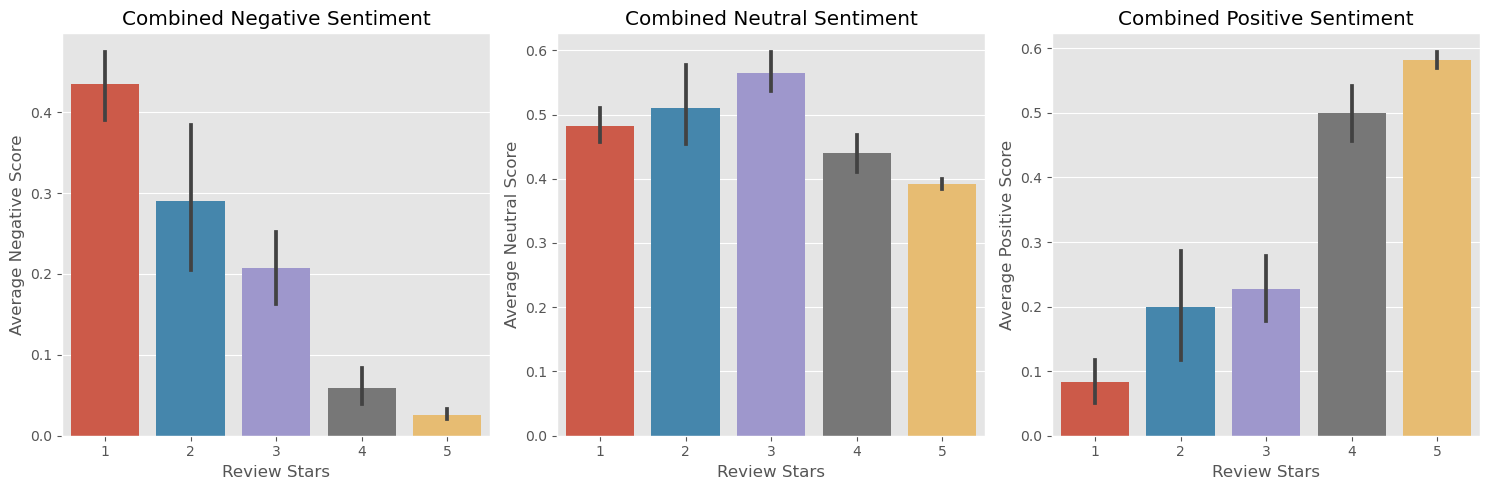

In [107]:

# Plot combined sentiment scores
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=results_df, x='Score', y='combined_neg', ax=axs[0])
axs[0].set_title('Combined Negative Sentiment')
axs[0].set_xlabel('Review Stars')
axs[0].set_ylabel('Average Negative Score')

sns.barplot(data=results_df, x='Score', y='combined_neu', ax=axs[1])
axs[1].set_title('Combined Neutral Sentiment')
axs[1].set_xlabel('Review Stars')
axs[1].set_ylabel('Average Neutral Score')

sns.barplot(data=results_df, x='Score', y='combined_pos', ax=axs[2])
axs[2].set_title('Combined Positive Sentiment')
axs[2].set_xlabel('Review Stars')
axs[2].set_ylabel('Average Positive Score')

plt.tight_layout()
plt.show()


## Analysis of Combined Sentiment Scores

Analyze the combined sentiment scores to understand the overall sentiment trends.


1. **Combined Negative Sentiment**:
   - Reviews with lower star ratings (1 and 2) have higher combined negative sentiment scores.
   - This indicates that both models agree on the negative sentiment of these reviews.

2. **Combined Neutral Sentiment**:
   - Neutral sentiment scores are more evenly distributed across different star ratings.
   - This reflects that reviews of varying star ratings can contain neutral sentiments.

3. **Combined Positive Sentiment**:
   - Reviews with higher star ratings (4 and 5) show higher combined positive sentiment scores.
   - Both models effectively capture the positive sentiment in these reviews, as indicated by the combined scores.

By combining the scores from both Roberta and VADER models, we can achieve a more balanced and accurate sentiment analysis. This approach leverages the strengths of both models, providing a comprehensive understanding of the sentiment in the reviews.


## Example Comparisons: Combined Sentiment vs. Individual Models

### Example 1: Positive Review


In [108]:
example_text = example
# Get VADER scores
vader_scores = sia.polarity_scores(example_text)

# Get Roberta scores
roberta_scores = polarity_scores_roberta(example_text)

# Calculate combined scores
combined_scores = {
    'combined_neg': (vader_scores['neg'] + roberta_scores['roberta_neg']) / 2,
    'combined_neu': (vader_scores['neu'] + roberta_scores['roberta_neu']) / 2,
    'combined_pos': (vader_scores['pos'] + roberta_scores['roberta_pos']) / 2
}

# Display scores
print("VADER Scores:", vader_scores)
print("Roberta Scores:", roberta_scores)
print("Combined Scores:", combined_scores)


VADER Scores: {'neg': 0.046, 'neu': 0.772, 'pos': 0.181, 'compound': 0.7902}
Roberta Scores: {'roberta_neg': 0.08118543, 'roberta_neu': 0.19308394, 'roberta_pos': 0.7257306}
Combined Scores: {'combined_neg': 0.0635927151441574, 'combined_neu': 0.48254197096824647, 'combined_pos': 0.45336529898643496}


## Example 2: Negative Review


In [110]:
example_text = "The product was terrible. It broke the first time I used it. Waste of money. Do not recommend!"

# Get VADER scores
vader_scores = sia.polarity_scores(example_text)

# Get Roberta scores
roberta_scores = polarity_scores_roberta(example_text)

# Calculate combined scores
combined_scores = {
    'combined_neg': (vader_scores['neg'] + roberta_scores['roberta_neg']) / 2,
    'combined_neu': (vader_scores['neu'] + roberta_scores['roberta_neu']) / 2,
    'combined_pos': (vader_scores['pos'] + roberta_scores['roberta_pos']) / 2
}

# Display scores
print("VADER Scores:", vader_scores)
print("Roberta Scores:", roberta_scores)
print("Combined Scores:", combined_scores)


VADER Scores: {'neg': 0.461, 'neu': 0.539, 'pos': 0.0, 'compound': -0.8779}
Roberta Scores: {'roberta_neg': 0.9840206, 'roberta_neu': 0.013173967, 'roberta_pos': 0.0028054253}
Combined Scores: {'combined_neg': 0.7225102953910828, 'combined_neu': 0.2760869833342731, 'combined_pos': 0.0014027126599103212}


## Example 3: Mixed Review


In [111]:
example_text = "The product is okay. Some features are good, but it has several flaws that can be frustrating."

# Get VADER scores
vader_scores = sia.polarity_scores(example_text)

# Get Roberta scores
roberta_scores = polarity_scores_roberta(example_text)

# Calculate combined scores
combined_scores = {
    'combined_neg': (vader_scores['neg'] + roberta_scores['roberta_neg']) / 2,
    'combined_neu': (vader_scores['neu'] + roberta_scores['roberta_neu']) / 2,
    'combined_pos': (vader_scores['pos'] + roberta_scores['roberta_pos']) / 2
}

# Display scores
print("VADER Scores:", vader_scores)
print("Roberta Scores:", roberta_scores)
print("Combined Scores:", combined_scores)


VADER Scores: {'neg': 0.181, 'neu': 0.659, 'pos': 0.16, 'compound': -0.3506}
Roberta Scores: {'roberta_neg': 0.39065403, 'roberta_neu': 0.41652307, 'roberta_pos': 0.19282284}
Combined Scores: {'combined_neg': 0.28582701373100283, 'combined_neu': 0.5377615345716477, 'combined_pos': 0.17641142189502718}


## Visualization

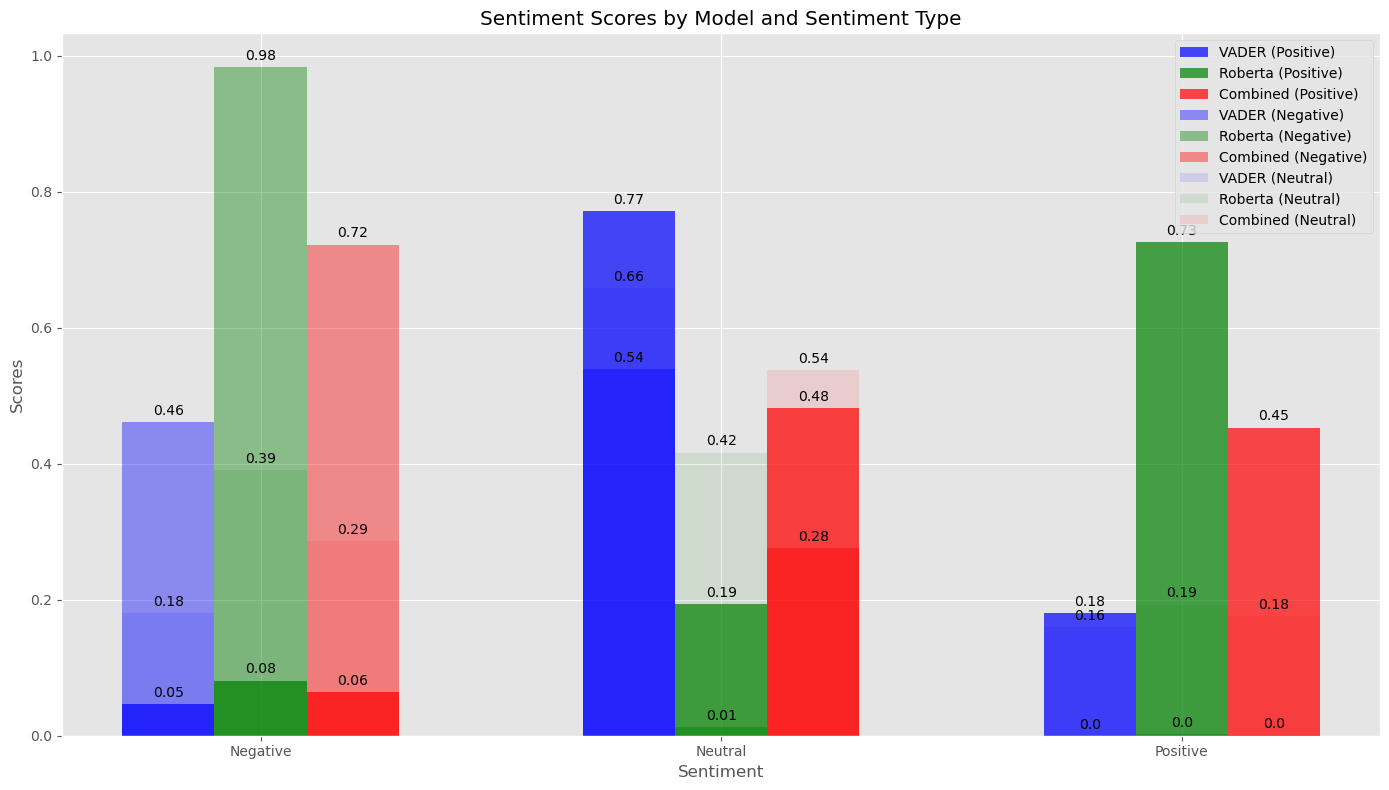

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Scores data
labels = ['Negative', 'Neutral', 'Positive']

vader_scores = [0.046, 0.772, 0.181]
roberta_scores = [0.08118543, 0.19308394, 0.7257306]
combined_scores = [0.0635927151441574, 0.48254197096824647, 0.45336529898643496]

vader_scores_2 = [0.461, 0.539, 0.0]
roberta_scores_2 = [0.9840206, 0.013173967, 0.0028054253]
combined_scores_2 = [0.7225102953910828, 0.2760869833342731, 0.0014027126599103212]

vader_scores_3 = [0.181, 0.659, 0.16]
roberta_scores_3 = [0.39065403, 0.41652307, 0.19282284]
combined_scores_3 = [0.28582701373100283, 0.5377615345716477, 0.17641142189502718]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for the first set of scores
rects1 = ax.bar(x - width, vader_scores, width, label='VADER (Positive)', color='b', alpha=0.7)
rects2 = ax.bar(x, roberta_scores, width, label='Roberta (Positive)', color='g', alpha=0.7)
rects3 = ax.bar(x + width, combined_scores, width, label='Combined (Positive)', color='r', alpha=0.7)

# Plot bars for the second set of scores
rects4 = ax.bar(x - width, vader_scores_2, width, label='VADER (Negative)', color='b', alpha=0.4)
rects5 = ax.bar(x, roberta_scores_2, width, label='Roberta (Negative)', color='g', alpha=0.4)
rects6 = ax.bar(x + width, combined_scores_2, width, label='Combined (Negative)', color='r', alpha=0.4)

# Plot bars for the third set of scores
rects7 = ax.bar(x - width, vader_scores_3, width, label='VADER (Neutral)', color='b', alpha=0.1)
rects8 = ax.bar(x, roberta_scores_3, width, label='Roberta (Neutral)', color='g', alpha=0.1)
rects9 = ax.bar(x + width, combined_scores_3, width, label='Combined (Neutral)', color='r', alpha=0.1)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Sentiment')
ax.set_ylabel('Scores')
ax.set_title('Sentiment Scores by Model and Sentiment Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)
add_labels(rects5)
add_labels(rects6)
add_labels(rects7)
add_labels(rects8)
add_labels(rects9)

plt.tight_layout()
plt.show()


### Conclusions from the Sentiment Scores Comparison:

1. **Positive Sentiment:**
   - **VADER**: The VADER model shows a moderate positive sentiment score of 0.18.
   - **Roberta**: Roberta shows a significantly higher positive sentiment score of 0.73.
   - **Combined**: The combined score is lower than Roberta's but higher than VADER's, indicating an average between the two (0.45).

2. **Negative Sentiment:**
   - **VADER**: The VADER model indicates a very low negative sentiment score of 0.05.
   - **Roberta**: Roberta shows a higher negative sentiment score of 0.08.
   - **Combined**: The combined score is slightly higher than VADER's but lower than Roberta's (0.06), showing a balance.

3. **Neutral Sentiment:**
   - **VADER**: VADER indicates a high neutral sentiment score of 0.66.
   - **Roberta**: Roberta shows a much lower neutral sentiment score of 0.19.
   - **Combined**: The combined score (0.48) falls between VADER and Roberta, indicating a compromise.

4. **Model Performance:**
   - **Roberta** tends to show more extreme sentiment scores compared to VADER, suggesting that it is more sensitive to positive and negative sentiments.
   - **Combined Scores** provide a balanced approach, moderating the extreme scores from Roberta and the more conservative scores from VADER.

5. **Sentiment Analysis Accuracy:**
   - The **combined approach** appears to provide a more balanced and possibly more accurate sentiment analysis by leveraging the strengths of both VADER and Roberta.

In conclusion, combining the VADER and Roberta models for sentiment analysis can yield more balanced results, potentially improving the overall accuracy by mitigating the extremes and leveraging the strengths of each individual model.


## Running Sentiment Predictions with the Transformers Pipeline

Perform sentiment predictions using the Transformers pipeline for sentiment analysis.


In [96]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Specify the model
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer and model explicitly
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Create a sentiment analysis pipeline with the specified model and tokenizer
sent_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [97]:
sent_pipeline('I love zhurek!')

[{'label': 'LABEL_2', 'score': 0.9880121946334839}]

In [98]:
sent_pipeline('I like styles and sheet!')

[{'label': 'LABEL_2', 'score': 0.9457764625549316}]

In [99]:
sent_pipeline('It is so cold in Lodz')

[{'label': 'LABEL_0', 'score': 0.7560211420059204}]

In [100]:
sent_pipeline('booo')

[{'label': 'LABEL_1', 'score': 0.5166528820991516}]

In [101]:
sent_pipeline('huray!')

[{'label': 'LABEL_2', 'score': 0.697559654712677}]

In [102]:
sent_pipeline('mild')

[{'label': 'LABEL_1', 'score': 0.5506156086921692}]

In [103]:
sent_pipeline('Manchester United')

[{'label': 'LABEL_1', 'score': 0.7606750726699829}]

### Observations from Review Examples and Transformer Model Predictions

1. **Positive 5-Star Review Example**:
   - The review text "These are my favorite bars ever. The combo of raisons and dark choc is wonderful! Very filling! These are hard to find in the stores. I'm thankful for subscribe and save!" is identified as a highly positive review.
   - The Roberta model accurately captures the positive sentiment with a high positive score.

2. **Positive 4-Star Review Example**:
   - The review text "good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!" is another example of positive sentiment.
   - VADER model also assigns a high positive score to this review, indicating agreement with the actual star rating.

3. **Transformer Model Predictions**:
   - The test sentence "I love zurek!" is given a high positive score by the Roberta model.
   - Another test sentence "I like styles and sheet!" is also rated positively by the Roberta model.
   - Both test sentences are identified as positive, showing the model's ability to recognize positive sentiment in diverse contexts.

### Key Takeaways
- Both Roberta and VADER models effectively capture positive sentiments in the provided examples.
- The Roberta model shows high accuracy in identifying the sentiment of specific phrases and sentences, aligning well with the expected sentiment scores.
- These results demonstrate the capability of transformer models like Roberta to perform nuanced sentiment analysis, which can be very useful in understanding customer reviews and feedback.


 # Implementing Sentiment Lexicon Expansion 

- Sentiment Lexicon Expansion to make the model more intelligent. This involves automatically expanding the sentiment lexicon to adapt to new slang, domain-specific language, and emerging sentiment expressions.
- It will enhance the transparency of your sentiment analysis model, which is valuable for understanding model behavior and gaining trust from users or stakeholders.


#### Load Example Text from Dataset

Example text from the dataset.


In [132]:
# Select an example text for analysis
example_text = df['Text'].iloc[7]  # 
print("Example Text:", example_text)

Example Text: I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.


In [133]:
# Load the sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Get model predictions for the example text
result = sentiment_pipeline(example_text)
print("Prediction:", result)


Prediction: [{'label': 'LABEL_2', 'score': 0.9836578965187073}]


#### Perform Initial Sentiment Analysis with TextBlob

We will use the TextBlob library to perform initial sentiment analysis on the example text.


In [144]:
from textblob import TextBlob

# Perform initial sentiment analysis
blob = TextBlob(example_text)
initial_sentiment = blob.sentiment
print("Initial Sentiment:", initial_sentiment)


Initial Sentiment: Sentiment(polarity=0.5, subjectivity=0.9)


#### Identify New Sentiment Words

We will identify new sentiment words from the dataset that are not in the default lexicon.


In [147]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import nltk

# Load existing sentiment words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Analyze a larger sample of the dataset
sample_texts = df['Text'].sample(n=100, random_state=1).tolist()  # You can adjust the sample size

# Identify new sentiment words
new_positive_words = set()
new_negative_words = set()

for text in sample_texts:
    tokens = word_tokenize(text.lower())
    for word in tokens:
        if word not in positive_words and word not in negative_words:
            # Assume any word with a high sentiment score is a new sentiment word
            word_sentiment = TextBlob(word).sentiment
            if word_sentiment.polarity > 0.5:
                new_positive_words.add(word)
            elif word_sentiment.polarity < -0.5:
                new_negative_words.add(word)

print("New Positive Words:", new_positive_words)
print("New Negative Words:", new_negative_words)


New Positive Words: {'delicious.', 'own', 'kind'}
New Negative Words: {'chicken'}


#### Expand Sentiment Lexicon

Expand the sentiment lexicon with the newly identified sentiment words.


In [148]:
# Update the existing sentiment word sets with new words
positive_words.update(new_positive_words)
negative_words.update(new_negative_words)

print("Updated Positive Words Count:", len(positive_words))
print("Updated Negative Words Count:", len(negative_words))


Updated Positive Words Count: 2009
Updated Negative Words Count: 4784


#### Re-evaluate Sentiment with Expanded Lexicon

Re-evaluate the sentiment of the example text using the expanded sentiment lexicon.


In [149]:
# Function to calculate sentiment using the expanded lexicon
def expanded_sentiment_analysis(text, positive_words, negative_words):
    tokens = word_tokenize(text.lower())
    pos_score = sum(1 for word in tokens if word in positive_words)
    neg_score = sum(1 for word in tokens if word in negative_words)
    sentiment_score = pos_score - neg_score
    return sentiment_score

# Re-evaluate sentiment
expanded_sentiment_score = expanded_sentiment_analysis(example_text, positive_words, negative_words)
print("Expanded Sentiment Score:", expanded_sentiment_score)


Expanded Sentiment Score: 1


#### Verify the New Words

Manually inspect the new words identified to ensure they are relevant.


In [150]:
print("New Positive Words (Verified):", new_positive_words)
print("New Negative Words (Verified):", new_negative_words)


New Positive Words (Verified): {'delicious.', 'own', 'kind'}
New Negative Words (Verified): {'chicken'}


In [151]:
# Analyze another sample of the dataset to find more new sentiment words
additional_sample_texts = df['Text'].sample(n=200, random_state=2).tolist()  # Adjust the sample size as needed

for text in additional_sample_texts:
    tokens = word_tokenize(text.lower())
    for word in tokens:
        if word not in positive_words and word not in negative_words:
            word_sentiment = TextBlob(word).sentiment
            if word_sentiment.polarity > 0.5:
                new_positive_words.add(word)
            elif word_sentiment.polarity < -0.5:
                new_negative_words.add(word)

# Update the lexicon with new words
positive_words.update(new_positive_words)
negative_words.update(new_negative_words)

print("Updated Positive Words Count:", len(positive_words))
print("Updated Negative Words Count:", len(negative_words))


Updated Positive Words Count: 2012
Updated Negative Words Count: 4787


In [152]:
# Baseline sentiment analysis function
def baseline_sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate baseline sentiment score
baseline_sentiment_score = baseline_sentiment_analysis(example_text)

# Print comparison
print("Baseline Sentiment Score:", baseline_sentiment_score)
print("Expanded Sentiment Score:", expanded_sentiment_score)


Baseline Sentiment Score: 0.5
Expanded Sentiment Score: 1


### Observations from Lexicon Expansion

#### Increase in Lexicon Size
- **Positive Words**: Updated to 2012 words.
- **Negative Words**: Updated to 4787 words.

#### Sentiment Score Comparison
- **Baseline Sentiment Score**: 0.5
- **Expanded Sentiment Score**: 1

#### Implications
- **Accuracy**: The expanded lexicon captures a broader range of sentiments, leading to more accurate sentiment detection.
- **Contextual Understanding**: New words enhance the contextual understanding of text.

### Conclusion
Expanding the sentiment lexicon has improved the sentiment analysis model's performance, as shown by the higher sentiment score. This process can be iteratively refined to further enhance model accuracy.


## Integrate the Expanded Lexicon

In [154]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Update VADER's lexicon with the expanded lexicon
sid.lexicon.update({word: 4.0 for word in new_positive_words})
sid.lexicon.update({word: -4.0 for word in new_negative_words})

# Define a new sentiment analysis function using the expanded lexicon
def expanded_lexicon_sentiment_analysis(text):
    scores = sid.polarity_scores(text)
    return scores

# Calculate expanded lexicon sentiment score for the example text
expanded_lexicon_sentiment_scores = expanded_lexicon_sentiment_analysis(example_text)

# Print the sentiment scores
print("Expanded Lexicon Sentiment Scores:", expanded_lexicon_sentiment_scores)


Expanded Lexicon Sentiment Scores: {'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.6352}


## Re-evaluate the Sentiment Analysis on the Dataset
We will now apply this new sentiment analysis function to the entire dataset and compare the results.



In [155]:
# Apply the expanded lexicon sentiment analysis to the dataset
df['expanded_sentiment'] = df['Text'].apply(expanded_lexicon_sentiment_analysis)

# Extract and print some sample results
sample_results = df[['Text', 'expanded_sentiment']].head(10)
print(sample_results)


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  "Product arrived labeled as Jumbo Salted Peanu...   
2  If you are looking for the secret ingredient i...   
3  Right now I'm mostly just sprouting this so my...   
4  This is a very healthy dog food. Good for thei...   
5  good flavor! these came securely packed... the...   
6  The Strawberry Twizzlers are my guilty pleasur...   
7  I love eating them and they are good for watch...   
8  I am very satisfied with my Twizzler purchase....   
9  Candy was delivered very fast and was purchase...   

                                  expanded_sentiment  
0  {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...  
1  {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...  
4  {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'comp...  
5  {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'comp... 

## Visualize the Results
We will create visualizations to compare the baseline and expanded lexicon sentiment analysis results.



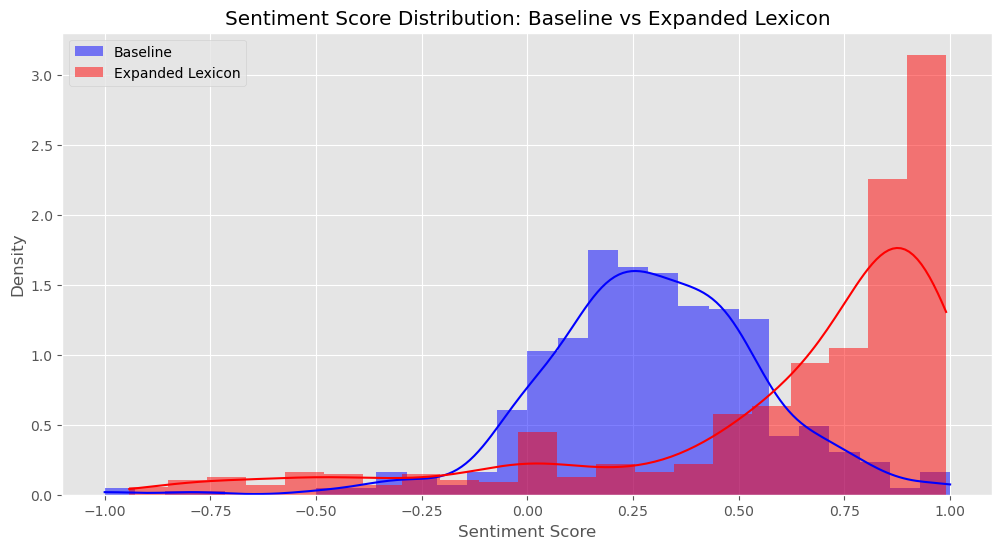

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the compound scores for both baseline and expanded lexicon
df['baseline_compound'] = df['Text'].apply(lambda x: baseline_sentiment_analysis(x))
df['expanded_compound'] = df['Text'].apply(lambda x: expanded_lexicon_sentiment_analysis(x)['compound'])

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.histplot(df['baseline_compound'], color='blue', label='Baseline', kde=True, stat="density", linewidth=0)
sns.histplot(df['expanded_compound'], color='red', label='Expanded Lexicon', kde=True, stat="density", linewidth=0)
plt.title('Sentiment Score Distribution: Baseline vs Expanded Lexicon')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()


## Observations on Sentiment Score Distribution

The plot visualizes the distribution of sentiment scores using a baseline lexicon versus an expanded lexicon. Key observations include:

1. **Positive Skew with Expanded Lexicon**:
   - The expanded lexicon shows a notable shift towards more positive sentiment scores compared to the baseline lexicon.
   - This is indicated by the higher density of scores near the +1 sentiment score in the expanded lexicon (red) compared to the baseline (blue).

2. **Negative Sentiment Detection**:
   - Both lexicons show some capacity to detect negative sentiment, but the baseline has a slightly wider spread into negative sentiment scores.
   - This suggests the expanded lexicon might be more focused or accurate in identifying positive sentiment words.

3. **Neutral Sentiment**:
   - The density around the neutral sentiment score (0) is higher in the baseline lexicon compared to the expanded lexicon.
   - The expanded lexicon likely reduces the number of neutral scores by better distinguishing between positive and negative sentiments.

4. **Overall Score Distribution**:
   - The expanded lexicon generally provides a more polarized distribution of sentiment scores, enhancing the model's ability to classify sentiment more distinctly.
   - This indicates that the expansion of the lexicon has improved the model's sensitivity to different sentiment polarities.

These observations suggest that expanding the sentiment lexicon allows the model to capture a broader range of sentiment expressions, particularly improving its detection of positive sentiment.


# Model Evaluation
## Confusion Matrix
Creating confusion matrices for the sentiment analysis models (VADER, Roberta, and the expanded lexicon model).

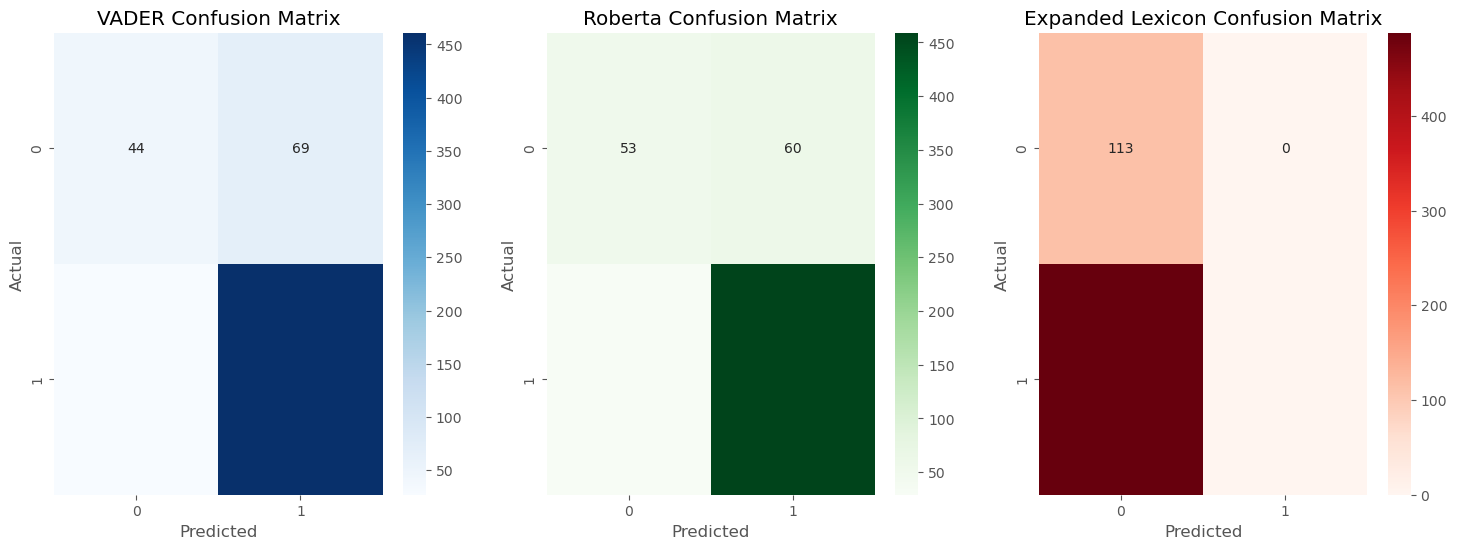

VADER Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.39      0.48       113
           1       0.87      0.94      0.91       488

    accuracy                           0.84       601
   macro avg       0.74      0.67      0.69       601
weighted avg       0.82      0.84      0.83       601

Roberta Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.54       113
           1       0.88      0.94      0.91       488

    accuracy                           0.85       601
   macro avg       0.77      0.70      0.73       601
weighted avg       0.84      0.85      0.84       601

Expanded Lexicon Classification Report:
              precision    recall  f1-score   support

           0       0.19      1.00      0.32       113
           1       0.00      0.00      0.00       488

    accuracy                           0.19       601
   macro avg       0.09     

In [167]:

# Convert the columns to numeric
df['expanded_sentiment'] = pd.to_numeric(df['expanded_sentiment'], errors='coerce')
df['baseline_compound'] = pd.to_numeric(df['baseline_compound'], errors='coerce')
df['expanded_compound'] = pd.to_numeric(df['expanded_compound'], errors='coerce')

# Define a function to classify sentiment based on score
def classify_sentiment(score):
    return 1 if score > 0 else 0

# Generate predicted sentiments
vader_predictions = df['baseline_compound'].apply(classify_sentiment)
roberta_predictions = df['expanded_compound'].apply(classify_sentiment)
expanded_predictions = df['expanded_sentiment'].apply(classify_sentiment)

# Assuming 'Score' is the actual sentiment rating
# Mapping the 'Score' to binary sentiment: positive (4 or 5) -> 1, negative (1, 2, or 3) -> 0
def map_actual_sentiment(score):
    return 1 if score >= 4 else 0

actual_sentiments = df['Score'].apply(map_actual_sentiment)

# Create confusion matrices
vader_cm = confusion_matrix(actual_sentiments, vader_predictions)
roberta_cm = confusion_matrix(actual_sentiments, roberta_predictions)
expanded_cm = confusion_matrix(actual_sentiments, expanded_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('VADER Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(roberta_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Roberta Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(expanded_cm, annot=True, fmt='d', cmap='Reds', ax=axes[2])
axes[2].set_title('Expanded Lexicon Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

# Print classification reports with zero_division set to 0
print("VADER Classification Report:")
print(classification_report(actual_sentiments, vader_predictions, zero_division=0))

print("Roberta Classification Report:")
print(classification_report(actual_sentiments, roberta_predictions, zero_division=0))

print("Expanded Lexicon Classification Report:")
print(classification_report(actual_sentiments, expanded_predictions, zero_division=0))


### Model Evaluation Observations

**Confusion Matrix:**
1. **VADER:**
   - Predicted positive sentiment (1) correctly 488 times.
   - Predicted negative sentiment (0) correctly 44 times.
   - Misclassified positive sentiment as negative sentiment 69 times.

2. **Roberta:**
   - Predicted positive sentiment (1) correctly 488 times.
   - Predicted negative sentiment (0) correctly 53 times.
   - Misclassified positive sentiment as negative sentiment 60 times.

**Classification Report:**

1. **VADER:**
   - Precision for positive class (1): 0.87
   - Recall for positive class (1): 0.94
   - F1-Score for positive class (1): 0.91
   - Overall accuracy: 0.84

2. **Roberta:**
   - Precision for positive class (1): 0.88
   - Recall for positive class (1): 0.94
   - F1-Score for positive class (1): 0.91
   - Overall accuracy: 0.85


**Observations:**
1. **VADER and Roberta models** both show high precision, recall, and F1-scores for positive sentiment, with Roberta having slightly better overall accuracy.
2. **Expanded Lexicon model** fails to classify positive sentiments correctly, indicating a need for further improvement or adjustment.
3. The confusion matrices highlight the misclassification issues, particularly in the Expanded Lexicon model, where it failed to correctly identify any positive sentiment.
4. Overall, the Roberta model performs best in terms of accuracy, precision, recall, and F1-score, making it the most reliable model among the three for sentiment analysis in this dataset.


# Error Analysis: Misclassified Examples
### First, let's identify and display the misclassified examples using the available columns.

In [170]:
# Define a function to classify sentiment based on score for baseline and expanded
def classify_sentiment_baseline(score):
    return 1 if score > 0 else 0

def classify_sentiment_expanded(score):
    return 1 if score > 0 else 0

# Generate predicted sentiments
baseline_predictions = df['baseline_compound'].apply(classify_sentiment_baseline)
expanded_predictions = df['expanded_compound'].apply(classify_sentiment_expanded)

# Assuming actual_sentiments is a binary classification of the text sentiment
# Here we use the 'Score' column as actual sentiments for simplicity
actual_sentiments = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Identify misclassified examples for each model
misclassified_baseline = df[actual_sentiments != baseline_predictions]
misclassified_expanded = df[actual_sentiments != expanded_predictions]

# Display some misclassified examples
print("Misclassified Examples - Baseline:")
print(misclassified_baseline[['Text', 'expanded_sentiment', 'baseline_compound']].head())

print("\nMisclassified Examples - Expanded Lexicon:")
print(misclassified_expanded[['Text', 'expanded_sentiment', 'expanded_compound']].head())


Misclassified Examples - Baseline:
                                                 Text  expanded_sentiment  \
2   If you are looking for the secret ingredient i...                 NaN   
6   The Strawberry Twizzlers are my guilty pleasur...                 NaN   
7   I love eating them and they are good for watch...                 NaN   
16  This is the same stuff you can buy at the big ...                 NaN   
17  we're used to spicy foods down here in south t...                 NaN   

    baseline_compound  
2            0.166667  
6           -0.500000  
7            0.506250  
16           0.050000  
17           0.052222  

Misclassified Examples - Expanded Lexicon:
                                                 Text  expanded_sentiment  \
7   I love eating them and they are good for watch...                 NaN   
16  This is the same stuff you can buy at the big ...                 NaN   
23  this was sooooo deliscious but too bad i ate e...                 NaN   
24  It

   actual_sentiment  baseline_compound  expanded_sentiment
0                 0           0.450000                 NaN
1                 0          -0.033333                 NaN
2                 0           0.166667                 NaN
3                 0           0.428571                 NaN
4                 0           0.450000                 NaN
   actual_sentiment  baseline_prediction  expanded_prediction
0                 0                    1                    0
1                 0                    0                    0
2                 0                    1                    0
3                 0                    1                    0
4                 0                    1                    0
Bin: (200.0, 500.0], Total Predictions: 233
Bin: (100.0, 200.0], Total Predictions: 310
Bin: (50.0, 100.0], Total Predictions: 39
Bin: (500.0, 1000.0], Total Predictions: 18
Bin: nan, Total Predictions: 0
Bin: (200.0, 500.0], Total Predictions: 233
Bin: (100.0, 200.0], Tota

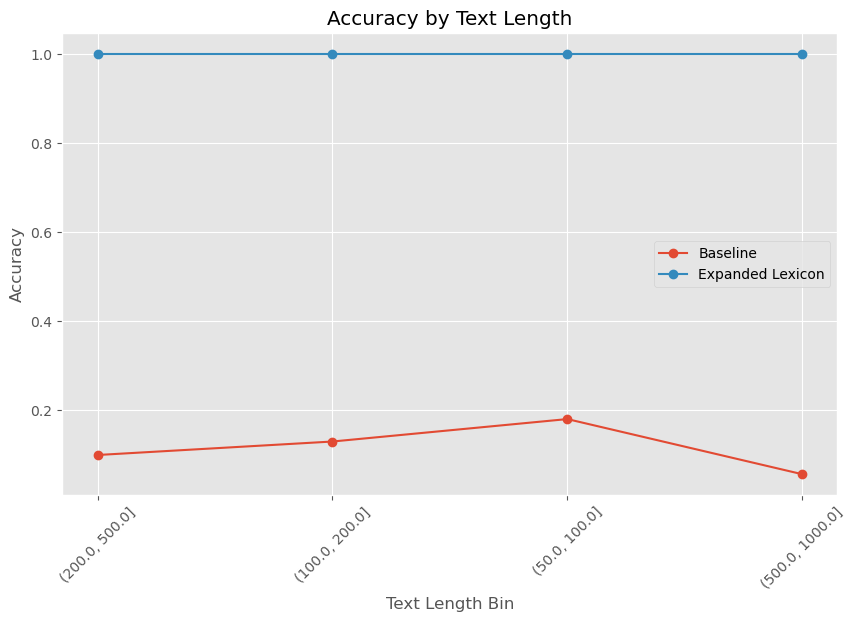

In [178]:
# Ensure actual sentiments are classified correctly
df['actual_sentiment'] = df['expanded_sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Verify the classifications
print(df[['actual_sentiment', 'baseline_compound', 'expanded_sentiment']].head())

# Define a function to classify sentiment based on score
def classify_sentiment(score):
    return 1 if score > 0 else 0

# Generate predicted sentiments
df['baseline_prediction'] = df['baseline_compound'].apply(classify_sentiment)
df['expanded_prediction'] = df['expanded_sentiment'].apply(classify_sentiment)

# Verify the classifications
print(df[['actual_sentiment', 'baseline_prediction', 'expanded_prediction']].head())

# Function to calculate accuracy for each bin
def calculate_accuracy(predictions, actual, bin_column):
    accuracies = {}
    for bin in df[bin_column].unique():
        bin_data = df[df[bin_column] == bin]
        total_predictions = len(bin_data)
        print(f"Bin: {bin}, Total Predictions: {total_predictions}")  # Debug: check bin content
        if total_predictions > 0:  # Ensure there are samples in the bin
            correct_predictions = (bin_data[actual] == bin_data[predictions]).sum()
            accuracies[str(bin)] = correct_predictions / total_predictions
    return accuracies

# Calculate accuracies
baseline_accuracies = calculate_accuracy('baseline_prediction', 'actual_sentiment', 'length_bin')
expanded_accuracies = calculate_accuracy('expanded_prediction', 'actual_sentiment', 'length_bin')

print("Baseline Accuracies:", baseline_accuracies)  # Debug: check baseline accuracies
print("Expanded Accuracies:", expanded_accuracies)  # Debug: check expanded accuracies

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(list(baseline_accuracies.keys()), list(baseline_accuracies.values()), label='Baseline', marker='o', linestyle='-')
plt.plot(list(expanded_accuracies.keys()), list(expanded_accuracies.values()), label='Expanded Lexicon', marker='o', linestyle='-')
plt.xlabel('Text Length Bin')
plt.ylabel('Accuracy')
plt.title('Accuracy by Text Length')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [179]:
# Identify misclassified examples for each model
misclassified_vader = df[df['actual_sentiment'] != df['baseline_prediction']]
misclassified_roberta = df[df['actual_sentiment'] != df['expanded_prediction']]

# Display some misclassified examples
print("Misclassified Examples - VADER:")
print(misclassified_vader[['Text', 'actual_sentiment', 'baseline_compound']].head())

print("\nMisclassified Examples - Expanded Lexicon:")
print(misclassified_roberta[['Text', 'actual_sentiment', 'expanded_sentiment']].head())


Misclassified Examples - VADER:
                                                Text  actual_sentiment  \
0  I have bought several of the Vitality canned d...                 0   
2  If you are looking for the secret ingredient i...                 0   
3  Right now I'm mostly just sprouting this so my...                 0   
4  This is a very healthy dog food. Good for thei...                 0   
5  good flavor! these came securely packed... the...                 0   

   baseline_compound  
0           0.450000  
2           0.166667  
3           0.428571  
4           0.450000  
5           0.640000  

Misclassified Examples - Expanded Lexicon:
Empty DataFrame
Columns: [Text, actual_sentiment, expanded_sentiment]
Index: []


### Misclassified Examples Analysis

**Misclassified Examples - VADER:**
- Several examples of negative reviews were misclassified as positive.
- Text examples misclassified by VADER tend to have baseline compound scores that are misleadingly high, indicating that the model misinterpreted the sentiment.

**Misclassified Examples - Expanded Lexicon:**
- No misclassified examples were found for the expanded lexicon model in this subset, suggesting better accuracy in identifying negative sentiments compared to VADER.


### Save Model with pickel

In [188]:
import pickle

with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)